<a href="https://colab.research.google.com/github/Thennavan-Hex/SIH-23/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
!pip install pytesseract

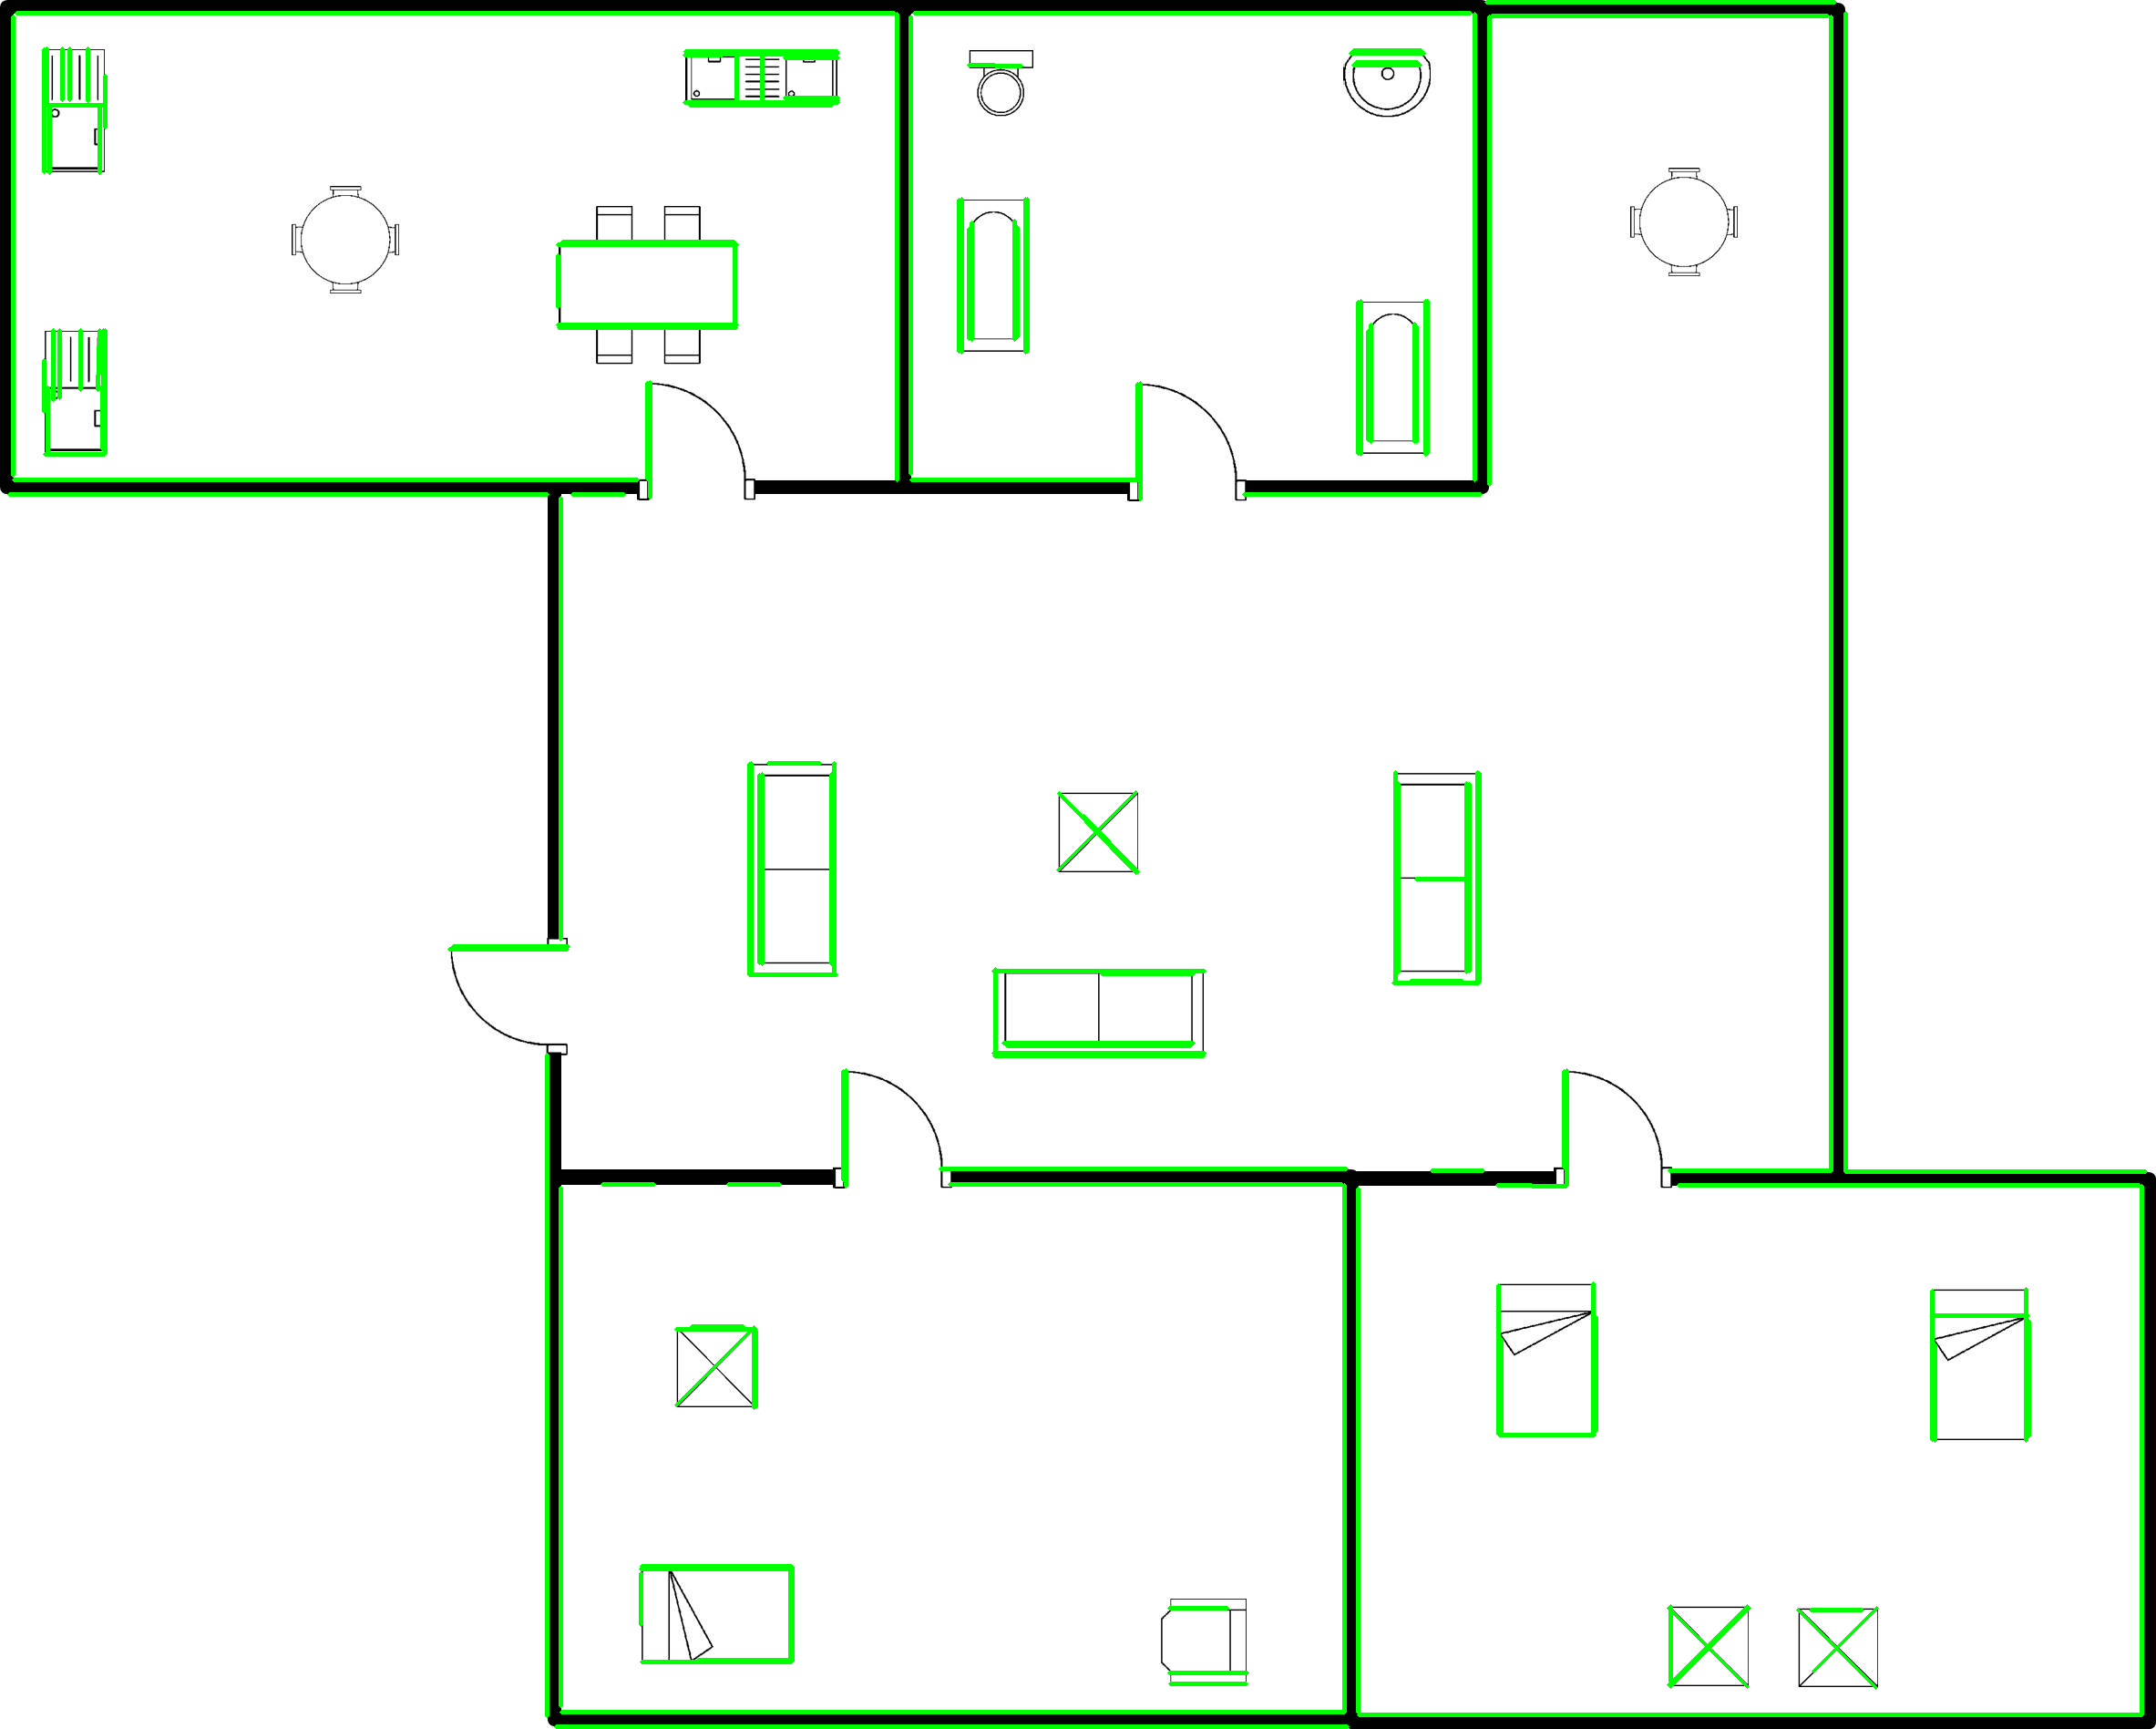

SVG saved as output.svg


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the 2D blueprint image
image = cv2.imread('Cat35_6.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform edge detection using Canny
edges = cv2.Canny(blurred_image, 50, 150)

# Perform Hough line transform to detect lines in the image
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=5)

# Iterate over the detected lines and draw them on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 3)

# Show the image with detected walls
cv2_imshow(image)

# Function to convert lines to SVG format
def lines_to_svg(lines, width, height):
    svg_header = f'<svg width="{width}" height="{height}" xmlns="http://www.w3.org/2000/svg">\n'
    svg_footer = '</svg>'

    svg_lines = ''
    for line in lines:
        x1, y1, x2, y2 = line[0]
        svg_lines += f'<line x1="{x1}" y1="{y1}" x2="{x2}" y2="{y2}" stroke="black" stroke-width="2"/>\n'

    return svg_header + svg_lines + svg_footer

# Convert the detected lines to SVG
svg_content = lines_to_svg(lines, image.shape[1], image.shape[0])

# Save the SVG content to a file
with open('output.svg', 'w') as file:
    file.write(svg_content)

print('SVG saved as output.svg')


In [ ]:
!pip install pytesseract

In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

In [ ]:
import cv2
import numpy as np

# Load the 2D blueprint image
image = cv2.imread('Cat35_6.jpg')

# Define a region of interest (ROI) where the door width value might be located
# Adjust the coordinates based on your blueprint layout
roi_start_x, roi_start_y, roi_end_x, roi_end_y = 100, 100, 300, 200
roi = image[roi_start_y:roi_end_y, roi_start_x:roi_end_x]

# Convert the ROI to grayscale
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Use OCR (Optical Character Recognition) to extract the door width value
# Assuming pytesseract is installed, if not, install using: pip install pytesseract
import pytesseract

# Configuration for pytesseract to extract digits (adjust as needed)
custom_config = r'--oem 3 --psm 7 outputbase digits'

# Perform OCR on the grayscale ROI
door_width_str = pytesseract.image_to_string(gray_roi, config=custom_config).strip()

# Check if we successfully extracted a numeric value
if door_width_str.replace('.', '', 1).isdigit():
    door_actual_width_inches = float(door_width_str)
else:
    # If OCR failed, use a default door width
    door_actual_width_inches = 36  # Example: default door width in inches

# Calculate scale (pixels per inch) using the detected or default door width
door_width_pixels = roi_end_x - roi_start_x
pixels_per_inch = door_width_pixels / door_actual_width_inches

# Calculate the area of the house (in square feet) using the scale
# Assuming the entire house is the area of interest
house_area_pixels = np.sum(image == [0, 255, 0])  # Assuming walls are marked in green (0, 255, 0)
house_area_square_inches = house_area_pixels / pixels_per_inch**2
house_area_square_feet = house_area_square_inches / 144  # 1 square foot = 144 square inches

print('Detected Door Width:', door_actual_width_inches, 'inches')
print('Estimated House Area:', house_area_square_feet, 'square feet')


Detected Door Width: 36 inches
Estimated House Area: 964.484325 square feet


In [ ]:
!pip install bpy

In [ ]:
import tensorflow as tf
import numpy as np
import bpy  # Blender Python API

# Read SVG data from a file
def read_svg_from_file(filename):
    with open(filename, 'r') as file:
        svg_data = file.read()
    return svg_data

# Generate dummy SVG data (simplified representation)
def generate_dummy_svg_data():
    # Generate a dummy SVG string
    svg_data = '<svg width="100" height="100"><rect x="10" y="10" width="80" height="80" fill="blue" /></svg>'
    return svg_data

# Preprocess SVG data (simplified representation)
def preprocess_svg_data(svg_data):
    # Process SVG data and convert to numerical representation
    # Return a numerical representation suitable for the model
    # This could involve parsing SVG and extracting relevant features
    # For simplicity, we'll just return a placeholder numerical representation
    numerical_representation = np.random.rand(100)  # Placeholder
    return numerical_representation

# Step 2: Model Architecture Design
# Define a simple autoencoder for demonstration purposes
def create_autoencoder(input_dim, encoding_dim):
    # Encoder
    input_data = tf.keras.layers.Input(shape=(input_dim,))
    encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_data)

    # Decoder
    decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

    # Autoencoder model
    autoencoder = tf.keras.models.Model(inputs=input_data, outputs=decoded)

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder

# Example usage
svg_file = 'output.svg'  # Replace with the correct path to your SVG file
svg_data = read_svg_from_file(svg_file)

# Assuming input_dim and encoding_dim appropriate for your data
input_dim = 100  # Replace with your actual input dimension
encoding_dim = 50  # Replace with your actual encoding dimension

autoencoder = create_autoencoder(input_dim, encoding_dim)

# Assuming X_train is your preprocessed SVG data (numerical representation)
# Replace this with your actual preprocessed SVG data
# X_train = preprocess_svg_data(svg_data)

# Training the autoencoder (replace X_train with your actual training data)
# autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True)

# After training, you can use the autoencoder to generate Blender object representations
# generate_blender_object_from_svg(svg_data)


In [ ]:
import tensorflow as tf
import numpy as np
import bpy  # Blender Python API
from google.colab import files
import os

# Rest of the code...

# Example usage
svg_file = 'output.svg'  # Replace with the correct path to your SVG file
svg_data = read_svg_from_file(svg_file)

# Assuming input_dim and encoding_dim appropriate for your data
input_dim = 100  # Replace with your actual input dimension
encoding_dim = 3  # For a 3D object representation

autoencoder = create_autoencoder(input_dim, encoding_dim)

# Upload model weights file
uploaded = files.upload()

# Print current working directory and list files
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir())

# Adjust the path based on the listed files
file_name = 'model_weights.h5' if 'model_weights.h5' in os.listdir() else 'path/to/your/directory/model_weights.h5'

# Load the trained autoencoder model weights
autoencoder.load_weights(file_name)  # Use the correct filename based on the list of files

# Generate Blender object from SVG data
generate_blender_object_from_svg(svg_data)


Saving Cat35_4.jpg to Cat35_4 (1).jpg
Current working directory: /content
Files in current directory: ['.config', '.ipynb_checkpoints', 'Cat35_4.jpg', 'output (1).svg', 'Cat35_6.jpg', 'Cat35_4 (1).jpg', 'output.svg', 'sample_data']


FileNotFoundError: ignored

Image Matrix (subset):
[[255 253 255 247 213 134  81  32   1   1]
 [248 255 210 120  30   0   0   0   1   1]
 [255 230  56   6   0   0  16   0   1   1]
 [249 120   0   1   0   0  11   1   1   1]
 [185  13   0  16   1   0   0   0   1   1]
 [141   0   0   2   0  15  20   0   1   1]
 [ 73   1  16   6   0   0   0   0   1   1]
 [ 14   1   0  14   8   7   0   9   1   1]
 [  1   1   1   1   1   1   1   1   8   0]
 [  1   1   1   1   1   1   1   1   4   1]]


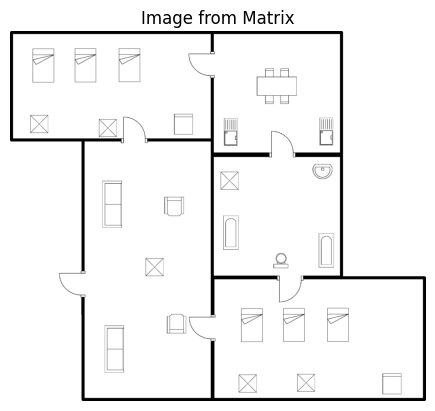

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def image_to_matrix(image_path):
    try:
        # Load the image using Pillow (PIL)
        image = Image.open(image_path).convert('L')

        # Convert the image to a NumPy array
        image_array = np.array(image)
        return image_array
    except Exception as e:
        print(f"An error occurred while converting image to matrix: {e}")
        return None

def matrix_to_image(matrix):
    try:
        # Normalize the matrix values to the range [0, 255]
        normalized_matrix = ((matrix - np.min(matrix)) / np.ptp(matrix) * 255).astype(np.uint8)

        # Create a PIL Image from the matrix
        image = Image.fromarray(normalized_matrix)

        # Display the image
        plt.imshow(image, cmap='gray')
        plt.title('Image from Matrix')
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"An error occurred while converting matrix to image: {e}")

def main():
    # Replace 'your_image_path.jpg' with the path to your image
    image_path = 'Cat35_4.jpg'

    try:
        # Convert the image to a matrix
        image_matrix = image_to_matrix(image_path)

        if image_matrix is not None:
            # Display a subset of the matrix (first 10x10 elements)
            print("Image Matrix (subset):")
            print(image_matrix[:10, :10])

            # Convert the matrix back to an image and display it
            matrix_to_image(image_matrix)
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")

if __name__ == "__main__":
    main()


Enter the length of the house: 40
Enter the width of the house: 50


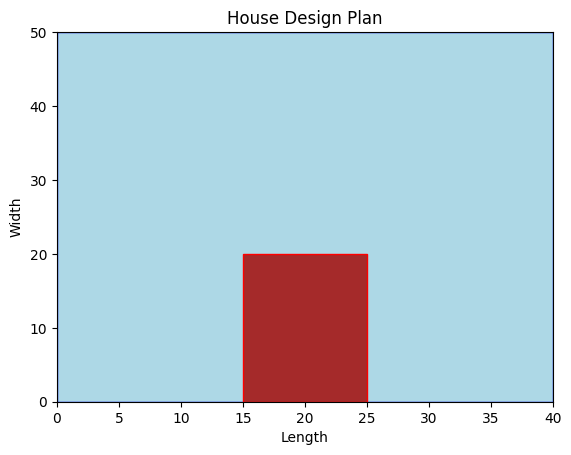

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_house(length, width):
    fig, ax = plt.subplots()
    ax.set_xlim(0, length)
    ax.set_ylim(0, width)

    # Draw the house
    house = Rectangle((0, 0), length, width, linewidth=1, edgecolor='b', facecolor='lightblue')
    ax.add_patch(house)

    # Draw a door
    door_width = min(width / 5, 10)
    door = Rectangle((length / 2 - door_width / 2, 0), door_width, door_width * 2, linewidth=1, edgecolor='r', facecolor='brown')
    ax.add_patch(door)

    plt.xlabel('Length')
    plt.ylabel('Width')
    plt.title('House Design Plan')
    plt.show()

def get_user_input():
    length = float(input("Enter the length of the house: "))
    width = float(input("Enter the width of the house: "))
    return length, width

if __name__ == "__main__":
    length, width = get_user_input()
    if length and width:
        draw_house(length, width)


In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import json

def image_to_matrix(image_path):
    try:
        # Load the image using Pillow (PIL)
        image = Image.open(image_path).convert('L')

        # Convert the image to a NumPy array
        image_array = np.array(image)
        return image_array
    except Exception as e:
        print(f"An error occurred while converting image to matrix: {e}")
        return None

def matrix_to_json(matrix, output_path):
    try:
        # Normalize the matrix values to the range [0, 255]
        normalized_matrix = ((matrix - np.min(matrix)) / np.ptp(matrix) * 255).astype(np.uint8)

        # Convert the matrix to a JSON-compatible format (a list of lists)
        json_data = normalized_matrix.tolist()

        # Save the JSON data to a file
        with open(output_path, 'w') as json_file:
            json.dump(json_data, json_file)
        print(f"Matrix data saved to {output_path}")
    except Exception as e:
        print(f"An error occurred while converting matrix to JSON: {e}")

def main():
    # Replace 'your_image_path.jpg' with the path to your image
    image_path = 'Cat35_4.jpg'

    try:
        # Convert the image to a matrix
        image_matrix = image_to_matrix(image_path)

        if image_matrix is not None:
            # Display a subset of the matrix (first 10x10 elements)
            print("Image Matrix (subset):")
            print(image_matrix[:10, :10])

            # Convert the matrix to JSON and save it to a file
            output_json_path = 'image_matrix.json'
            matrix_to_json(image_matrix, output_json_path)
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")

if __name__ == "__main__":
    main()


Image Matrix (subset):
[[255 253 255 247 213 134  81  32   1   1]
 [248 255 210 120  30   0   0   0   1   1]
 [255 230  56   6   0   0  16   0   1   1]
 [249 120   0   1   0   0  11   1   1   1]
 [185  13   0  16   1   0   0   0   1   1]
 [141   0   0   2   0  15  20   0   1   1]
 [ 73   1  16   6   0   0   0   0   1   1]
 [ 14   1   0  14   8   7   0   9   1   1]
 [  1   1   1   1   1   1   1   1   8   0]
 [  1   1   1   1   1   1   1   1   4   1]]
Matrix data saved to image_matrix.json
